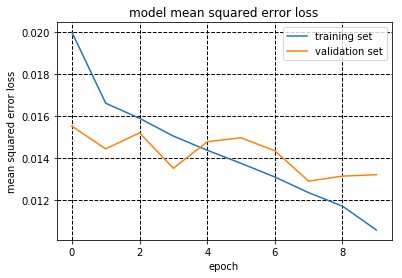

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = [0.019979555295419827, 0.016609403895308086, 0.015893590690448704, 0.015049004813107964, 0.014377852204628404, 0.013755249279112496, 0.013106415587214855, 0.012363721768405955, 0.011721779006998697, 0.010594132260721369]
valid_loss = [0.015518598837676036, 0.01444221113516546, 0.015202014028229079, 0.013520949858412221, 0.014778333516856331, 0.014970234117994261, 0.014351123123805024, 0.01291077623412532, 0.013147847532336391, 0.01321538991355036]
plt.plot(loss)
plt.plot(valid_loss)
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()